In [1]:
#Setting working directory
import os
path = 'E:\\Imarticus\\DSP22\\python'
os.chdir(path)
print(os.getcwd())

E:\Imarticus\DSP22\python


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import Image

In [2]:
#------------#
# Some Basics
#------------#

# kNN and Decision Trees are believed to be two most simple and intuitive Algos
# They are simple to understand and easy to explain

# KNN can be used for both classification and regression predictive problems.
    # Find k Nearest Neighbors and take the majority vote or average as applicable

# If you would like to substitute a missing value, (whether continuous or
# Categorical) kNN might work best in some cases

# kNN is also called a Lazy Learner
# A lazy learner, on the other hand, does not build any model beforehand; it waits for 
# the unclassified data and then winds it way through the algorithm to make classification 
# prediction. Lazy learners are, therefore, time consuming–each time a prediction is to be 
# made all the model building effort has to be performed again. We will see!


In [11]:
#==============================#
# Generic steps to KNN Modeling
#==============================#

# Load the data and clean/transform/standardize as applicable
# Initialise the value of k
# For getting the predicted class, iterate from 1 to total number of training data points
    # Calculate the distance between test data (record) and each row of training data. 
        # Here we will use Euclidean distance as our distance metric since it’s 
        # the most popular method and default one in many implementations.
    # Add the distance and the index of the example to an ordered collection
    # Sort the calculated distances in ascending order based on distance values
    # Get top k rows from the sorted array (k is the number of nearest neighbors needed)
    # Get the labels of those selected k entries
    # If regression, return the mean of the K labels
    # If classification, return the mode of the K labels

# k-NN does not require an explicit training step. In k-nearest neighbor algorithm, 
# the example data is first plotted on an n-dimensional space where ‘n’ is the number 
# of data-attributes. Each point in ‘n’-dimensional space is labeled with its class value.

# To discover classification of an unclassified data, the point is plotted on this n-dimensional 
# space and class labels of nearest k data points are noted. Generally k is an odd number.

# In the generic k-NN model, each time a prediction is to be made for a data point, 
# first this data point’s distance from all other points is to be calculated and then 
# only nearest k-points can be discovered for voting. This approach is also 
# known as brute-force approach.

# kNN for Classification

In [69]:
# Read the data
df = pd.read_csv('knn_Classified Data.txt', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
df.shape

(1000, 11)

In [6]:
# Import module to standardize the scale
from sklearn.preprocessing import StandardScaler
# Create instance (i.e. object) of the standard scaler
scaler = StandardScaler()
# Fit the object to all the data except the Target Class
# use the .drop() method to gather all features except Target Class
# axis -> argument refers to columns; a 0 would represent rows
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
# Use scaler object to conduct a transforms
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
# Review the array of values generated from the scaled features process
scaled_features
# Notice that we have normalized our dataset minus the target column

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [8]:
# Let us now create a dataframe of scaled features
df_scaled = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_scaled.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [9]:
# Let us now split the scaled data into training set and test set
# Import module to split the data
from sklearn.model_selection import train_test_split
# Set the X and ys
X = df_scaled
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=555)

In [33]:
# We are now ready to train the kNN model
# Import module for KNN
from sklearn.neighbors import KNeighborsClassifier
# Create KNN instance
knn = KNeighborsClassifier(n_neighbors=7)
# n_neighbors argument represents the k value, i.e. the amount of neighbors used to ID classification
# n_neighbors=1 means each sample is using itself as reference, that’s an overfitting case

# Fit (i.e. traing) the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [34]:
# Now that the model is built, let us use ir for prediction
pred = knn.predict(X_test)
# Review the predictions
pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [35]:
# Its time to evaluate our model
# Import classification report and confusion matrix to evaluate predictions
from sklearn.metrics import classification_report, confusion_matrix
# Print out classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       127
           1       0.89      0.95      0.92       123

   micro avg       0.92      0.92      0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [26]:
# This tells us our model was 92% accurate

In [36]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
#print(cmat)
print('TN - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))

TN - True Negative 113
FP - False Positive 14
FN - False Negative 6
TP - True Positive 117
Accuracy Rate: 0.92


In [37]:
# For determing the optimum value of k, you shoud ideally do multiple iterations while 
# training and then test it with testing data.
# To select the K that’s right for your data, we run the KNN algorithm several times with 
# different values of K and choose the K that reduces the number of errors we encounter 
# while maintaining the algorithm’s ability to accurately make predictions when it’s given 
# data it hasn’t seen before.

# Let us now evaluate the alternative k Values

# Let us create an empty list to capture the errors
error_rate = []
# Let us try the k values from 1 to 24
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

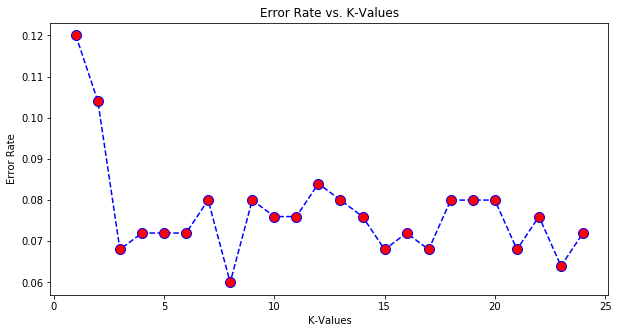

In [38]:
# It will be good to plot error rate over different k values
plt.figure(figsize=(10,5))
plt.plot(range(1,25), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

In [39]:
# We will retrain the model with an optimum k-value that we got from the above graph
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred_new = knn.predict(X_test)
# Print out classification report to see how better it has gotten
print(classification_report(y_test, pred_new))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       127
           1       0.90      0.97      0.93       123

   micro avg       0.93      0.93      0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



In [41]:
# Notice that our accuracy is 93% now.
# Let us print the confusion matrix:
cmat_new = confusion_matrix(y_test, pred_new)
#print(cmat)
print('TN - True Negative {}'.format(cmat_new[0,0]))
print('FP - False Positive {}'.format(cmat_new[0,1]))
print('FN - False Negative {}'.format(cmat_new[1,0]))
print('TP - True Positive {}'.format(cmat_new[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat_new[0,0],cmat_new[1,1]]),np.sum(cmat_new))))

TN - True Negative 114
FP - False Positive 13
FN - False Negative 4
TP - True Positive 119
Accuracy Rate: 0.932


In [43]:
# We can do a side by side comparison of the actual vs predicted values
Analysis = np.vstack([y_test, pred_new])
compare = pd.DataFrame({'Actual':Analysis[0],'Predicted':Analysis[1]})
print(compare)

     Actual  Predicted
0         0          0
1         1          0
2         0          0
3         1          1
4         0          0
5         1          1
6         0          0
7         1          1
8         0          0
9         0          0
10        1          1
11        1          1
12        1          1
13        0          0
14        1          1
15        1          1
16        1          1
17        0          0
18        0          0
19        1          1
20        0          0
21        0          0
22        1          1
23        1          1
24        1          1
25        0          0
26        0          0
27        0          0
28        0          0
29        0          0
..      ...        ...
220       1          1
221       0          0
222       0          0
223       0          0
224       1          1
225       0          0
226       1          1
227       1          1
228       1          1
229       1          1
230       0          0
231       0

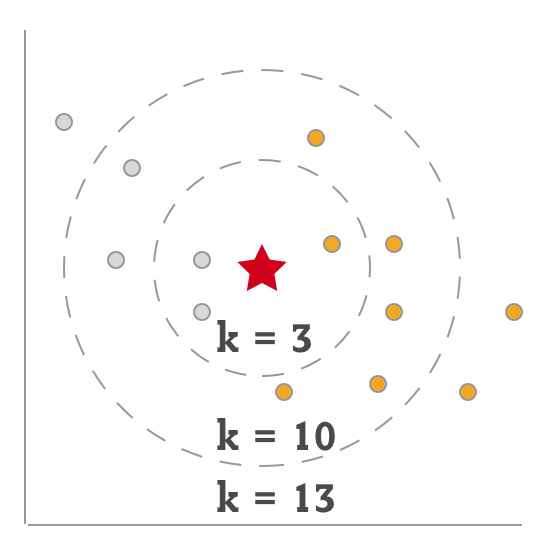

In [45]:
#==============================#
# Some more Insights
#==============================#
# In the Model Training phase, the only useful outcome could be determining the
  # optimal value for K

# k-NN performs much better if all of the data have the same scale 

# k-NN works well with a small number of input variables (p), but struggles 
# when the number of inputs is very large

Image('knn_kvalue.png')

In [1]:
#==============================#
# kNN in Practice
#==============================#

# Since kNN gets slower with volume of data, it is not used that extensively for prediction
# There are so many good algorithms for classification and regression that scale well

# kNNs is best suitable in solving problems that have solutions that 
# depend on identifying similar objects. An example of this is using the 
# KNN algorithm in recommender systems, an application of KNN-search.

In [73]:
data = pd.read_csv('wdbc_data.csv', header=None, index_col=0).reset_index()
data.drop(data.columns[0], axis=1, inplace=True)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [74]:
data.columns

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop(1, axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [79]:
scaled_features = scaler.transform(data.drop(1, axis=1))

In [84]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[1:])
df_feat.head()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data[1], test_size=0.3, train_size=0.7)

In [88]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [89]:
pred = knn.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix, classification_report

In [91]:
print(confusion_matrix(y_test, pred))

[[109   1]
 [  4  57]]


In [92]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           B       0.96      0.99      0.98       110
           M       0.98      0.93      0.96        61

   micro avg       0.97      0.97      0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
# Close  to 97% Accuracy!